### Importing Libraries and Data

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [52]:
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets'

In [53]:
df = pd.read_csv(os.path.join(path, 'cleaned_weather_date.csv'), index_col = 0)

In [54]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [55]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [56]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Isolating 2000-2009 from Data

In [58]:
df2000 = df[
    (df['DATE'].astype(str).str[:4] >= '2000') &
    (df['DATE'].astype(str).str[:4] <= '2009')
]

In [59]:
df2000

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,12,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,20091230,12,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [60]:
pleasant2000 = pleasant[
    (pleasant['DATE'].astype(str).str[:4] >= '2000') &
    (pleasant['DATE'].astype(str).str[:4] <= '2009')
]

In [70]:
pleasant2000

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df2000.drop(['DATE', 'MONTH'], axis=1, inplace=True)

C:\Users\Stugots\AppData\Local\Temp\ipykernel_11724\4000239814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000.drop(['DATE', 'MONTH'], axis=1, inplace=True)


In [74]:
pleasant2000.drop('DATE', axis=1, inplace=True)

C:\Users\Stugots\AppData\Local\Temp\ipykernel_11724\2329486596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant2000.drop('DATE', axis=1, inplace=True)


In [76]:
df2000

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,5,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,7,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,5.5,8,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8,4,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0,6,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,11.5,6,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [78]:
pleasant2000

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Converting to Array 

In [81]:
X = df2000
y = pleasant2000

In [83]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [85]:
X.shape

(3653, 135)

In [87]:
y.shape

(3653, 15)

### Split Data

In [90]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [92]:
y_train = np.argmax(y_train, axis = 1)

In [96]:
y_test = np.argmax(y_test, axis = 1)

In [104]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


### Random Forest Classifier

In [107]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.887308533916849


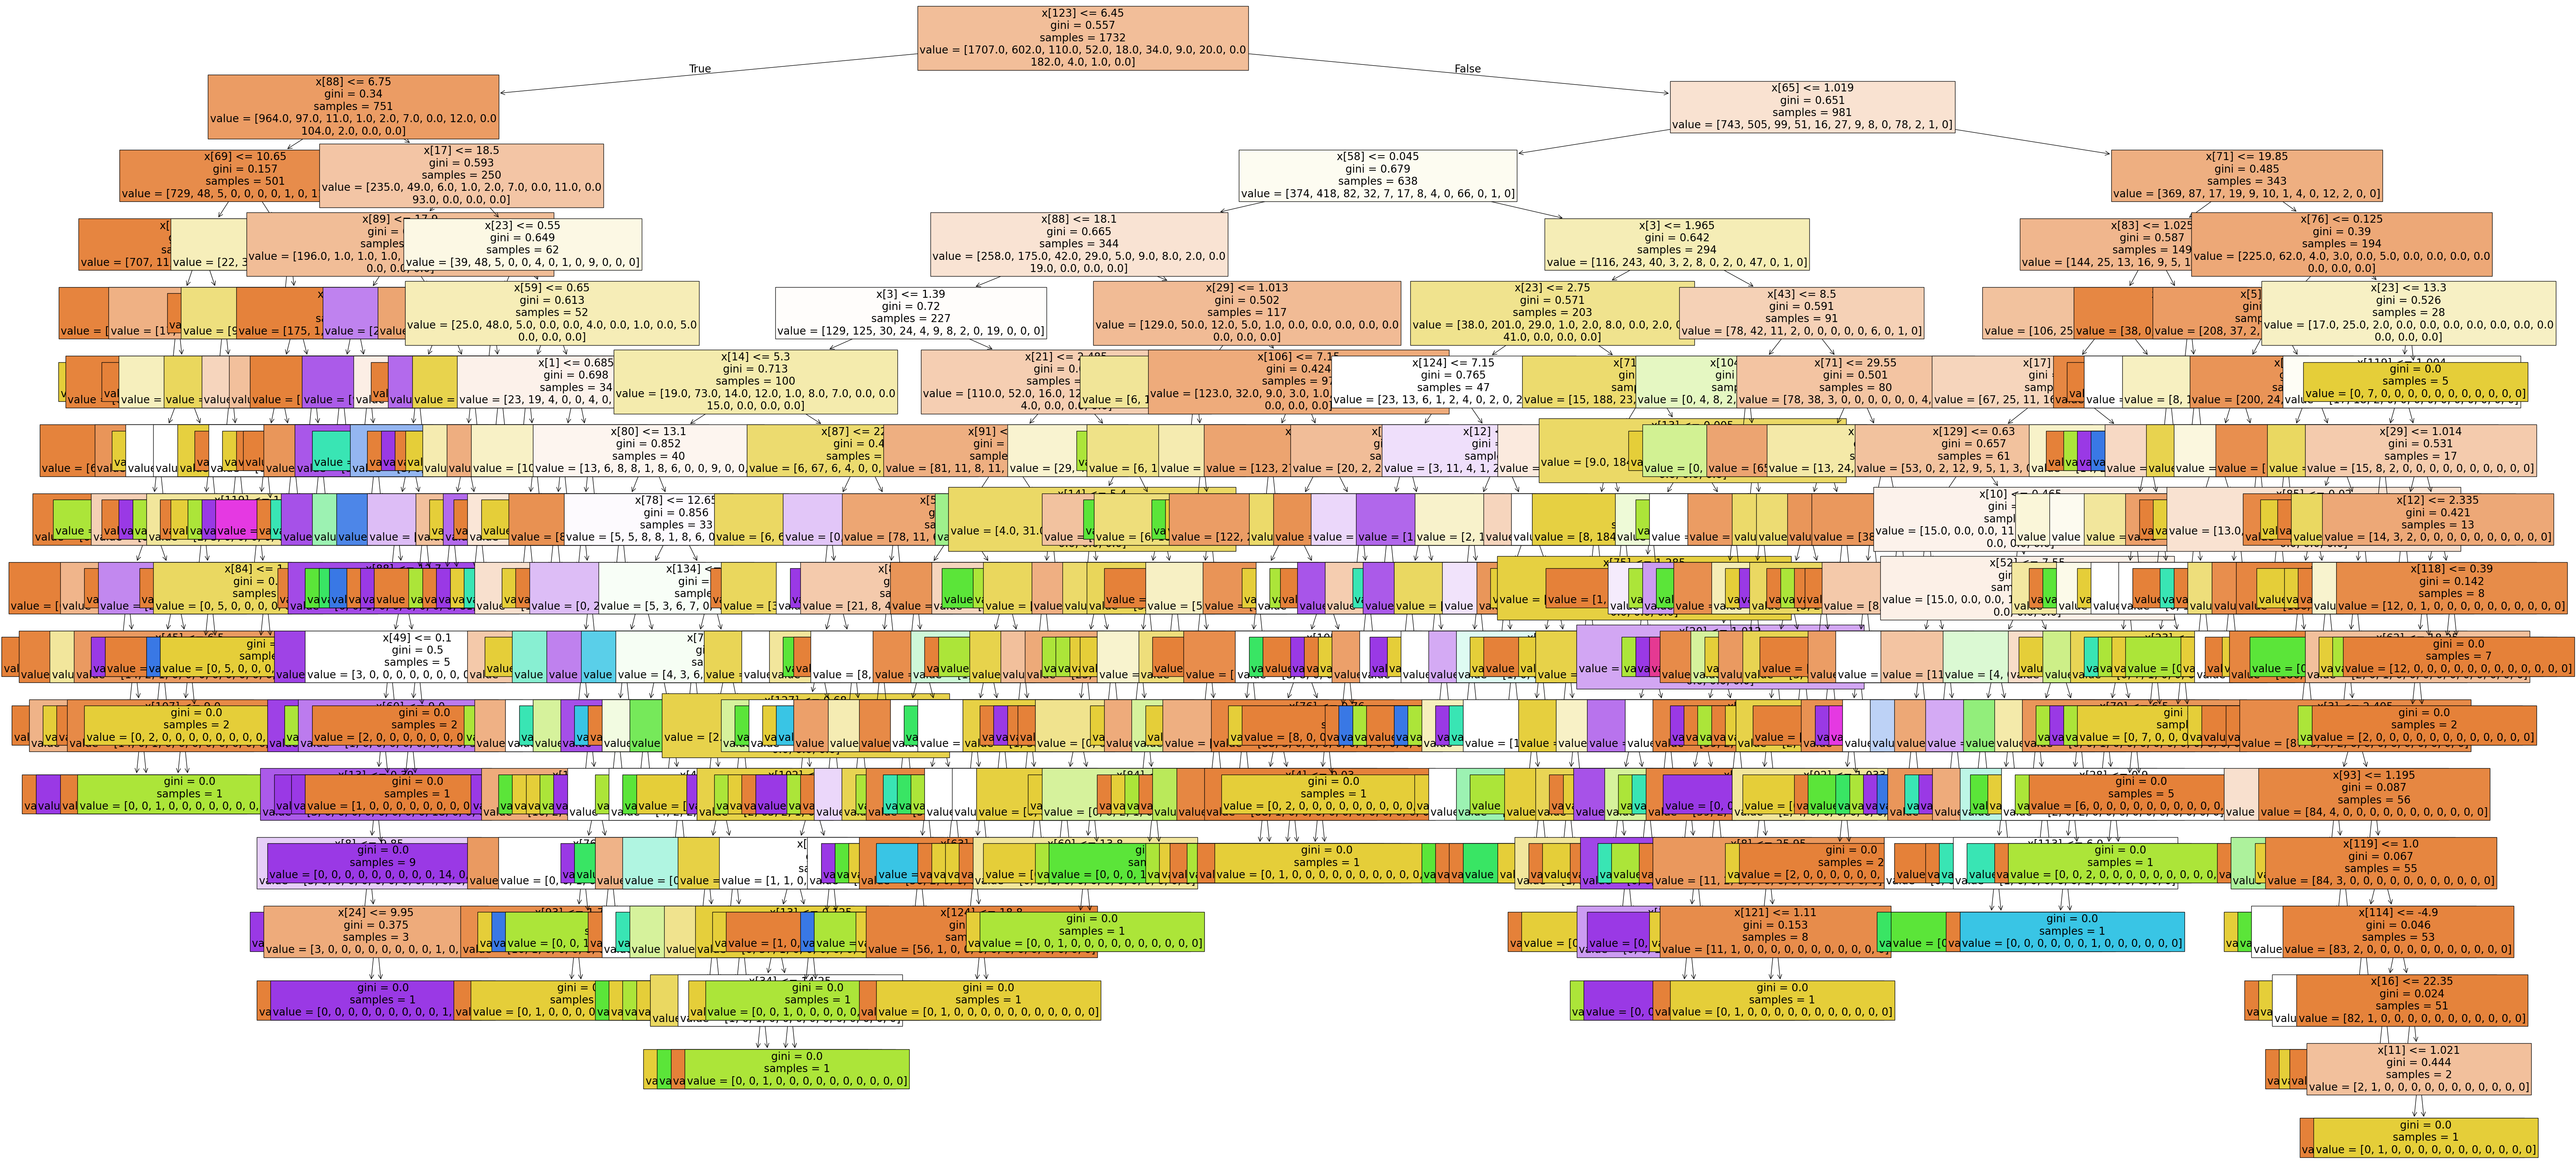

In [123]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [127]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape) # Should print: (135,)
newarray

(135,)


array([0.01471983, 0.00702268, 0.0063661 , 0.01785357, 0.09512875,
       0.02255304, 0.01235858, 0.00652899, 0.01784434, 0.00983404,
       0.00728391, 0.00575704, 0.00891732, 0.04374574, 0.010771  ,
       0.01828838, 0.01042337, 0.02951955, 0.00316434, 0.00533475,
       0.00579622, 0.00915704, 0.00743039, 0.0066299 , 0.01706157,
       0.00787462, 0.01747014, 0.00168287, 0.00306213, 0.00537307,
       0.00565762, 0.00377212, 0.00348191, 0.00394712, 0.00335414,
       0.00688042, 0.00169103, 0.00334866, 0.00617297, 0.00413361,
       0.00408317, 0.00386897, 0.00627584, 0.00347609, 0.00826596,
       0.00204934, 0.00346292, 0.00458545, 0.00482555, 0.00210197,
       0.00278409, 0.00502406, 0.0045683 , 0.00645838, 0.00215183,
       0.00336124, 0.00866637, 0.00447318, 0.00340509, 0.00346877,
       0.00564945, 0.00398894, 0.00782575, 0.00250751, 0.0047389 ,
       0.00423196, 0.00705526, 0.00363538, 0.00520419, 0.01477708,
       0.00967491, 0.01648612, 0.00232828, 0.00336324, 0.00775

In [129]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01471983, 0.00702268, 0.0063661 , 0.01785357, 0.09512875,
         0.02255304, 0.01235858, 0.00652899, 0.01784434],
        [0.00983404, 0.00728391, 0.00575704, 0.00891732, 0.04374574,
         0.010771  , 0.01828838, 0.01042337, 0.02951955],
        [0.00316434, 0.00533475, 0.00579622, 0.00915704, 0.00743039,
         0.0066299 , 0.01706157, 0.00787462, 0.01747014],
        [0.00168287, 0.00306213, 0.00537307, 0.00565762, 0.00377212,
         0.00348191, 0.00394712, 0.00335414, 0.00688042],
        [0.00169103, 0.00334866, 0.00617297, 0.00413361, 0.00408317,
         0.00386897, 0.00627584, 0.00347609, 0.00826596],
        [0.00204934, 0.00346292, 0.00458545, 0.00482555, 0.00210197,
         0.00278409, 0.00502406, 0.0045683 , 0.00645838],
        [0.00215183, 0.00336124, 0.00866637, 0.00447318, 0.00340509,
         0.00346877, 0.00564945, 0.00398894, 0.00782575],
        [0.00250751, 0.0047389 , 0.00423196, 0.00705526, 0.00363538,
         0.00520419, 0.01477708, 0.0096749

In [131]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.20037588, 0.14454034, 0.07991898, 0.03721141, 0.04131632,
       0.03586005, 0.04299062, 0.06831131, 0.0470962 , 0.10405979,
       0.06357851, 0.03015918, 0.03988364, 0.03364228, 0.0310555 ])

In [135]:
station = [col.split('_')[0] for col in df2000.columns if '_' in col]

# Step 2: Get unique station names
stations = set(station)
stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [137]:
important = pd.Series(sumarray, index = stations)
important = important.sort_values(ascending = False)
important

OSLO          0.200376
BELGRADE      0.144540
BASEL         0.104060
KASSEL        0.079919
DUSSELDORF    0.068311
DEBILT        0.063579
VALENTIA      0.047096
MAASTRICHT    0.042991
BUDAPEST      0.041316
STOCKHOLM     0.039884
MADRID        0.037211
HEATHROW      0.035860
MUNCHENB      0.033642
LJUBLJANA     0.031056
SONNBLICK     0.030159
dtype: float64

{'OSLO', 'BELGRADE', 'KASSEL', 'MADRID', 'BUDAPEST', 'HEATHROW', 'MAASTRICHT', 'DUSSELDORF', 'VALENTIA', 'BASEL', 'DEBILT', 'SONNBLICK', 'STOCKHOLM', 'MUNCHENB', 'LJUBLJANA'}


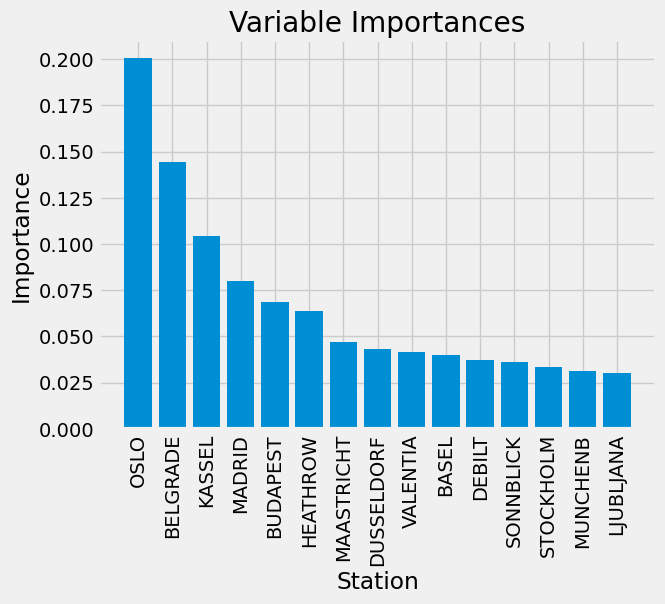

In [141]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Station'); plt.title('Variable Importances');